In [1]:
import os
import cv2

In [2]:
import os
from PIL import Image
import numpy as np
from IPython.display import Image
import torch
import PIL

In [21]:
dir_path="/content/drive/MyDrive/2기 딥러닝 프로젝트/train"
labels = ['Closed', 'Open']
x_data = []
y_data = []
for label in labels:
   path = os.path.join(dir_path, label)
   class_num = labels.index(label)
   import torchvision.transforms as transforms
   tf = transforms.ToTensor()
   for img in os.listdir(path): # closed 폴더 안에 _1.jpg, open 폴더 안에 1.jpg 
       paths = os.path.join(path, img)
       img =  PIL.Image.open(paths)
       re_img = img.resize((64,64))
       re_img = tf(re_img)
       re_img = re_img.tolist()
       if len(re_img) == 3:
         x_data.append(re_img)
         y_data.append(class_num)

x_data = torch.tensor(x_data)
y_data = torch.tensor(y_data)

자꾸 이런 expected sequence of length 3 at dim 1 (got 4) 오류가 나서

if len(re_img) == 3: 코드를 추가해주었고 이걸 하고 나니까 원래는 x shape이 1451이었는데 1449로 줄어들었다 아마 2개의 x_data의 shape이 다른 사진들과 달랐던 것 같다

In [22]:
x_data.shape

torch.Size([1449, 3, 64, 64])

In [23]:
y_data.shape

torch.Size([1449])

In [ ]:
y_data = np.array(y_data)
y_data = torch.tensor(y_data)
y_data.shape

torch.Size([1451])

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [ ]:
x_train.shape

torch.Size([1160, 3, 32, 32])

In [ ]:
y_train.shape

torch.Size([1160])

In [ ]:
X_train.type()

'torch.FloatTensor'

## **train**

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
import torch.optim as optim

In [28]:
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(4096, 512) 
        self.fc2 = nn.Linear(512, 1)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)),2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2)
        x = x.reshape(-1, 4096)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [27]:
import torch.nn as nn
import torch.nn.functional as F

x = torch.ones([1,3,64,64])
conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
output1 = conv1(x)
print(output1.shape)
x1 = F.max_pool2d(F.relu(output1),2)
print(x1.shape)
conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
output2 = conv2(x1)
print(output2.shape)
x2 = F.max_pool2d(F.relu(output2), 2)
print(x2.shape)
conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
output3 = conv3(x2)
print(output3.shape)
x3 = F.max_pool2d(F.relu(output3), 2)
print(x3.shape)

torch.Size([1, 16, 64, 64])
torch.Size([1, 16, 32, 32])
torch.Size([1, 32, 32, 32])
torch.Size([1, 32, 16, 16])
torch.Size([1, 64, 16, 16])
torch.Size([1, 64, 8, 8])


In [30]:
model = Net()
x = torch.ones(1, 3,64,64)
x = x.float()
output = model(x)
output.shape

torch.Size([1, 1])

In [31]:
model = Net()
model.to('cuda')
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

epochs = 50

In [32]:
def accuracy(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum / y_test.shape[0]
    acc = torch.round(acc * 100)

    return acc

In [33]:
for epoch in range(epochs):
    running_loss = 0.0
    running_acc = 0.0

    model.train()

    for i,data in enumerate(x_train, 0):
        optimizer.zero_grad()

        data = data.to('cuda')
        labels = y_train.to('cuda')

        k = torch.tensor(labels[i])
        k = k.view(1,-1)
        k = k.float()
        k = k.to('cuda')
        outputs = model(data)
        #print("intpus_1 shape: ",input_1.shape)
        #print("outputs shape: ",outputs.shape)
        #print("labels shape",labels.shape)
         #labels = labels.view(len(labels),-1)
        loss = criterion(outputs, k)
        
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        running_acc += accuracy(outputs, k)

        if i % 80 == 79:
            print('epoch: [%d/%d] train_loss: %.5f train_acc: %.5f' % (
                epoch + 1, epochs, running_loss / 80, running_acc / 80))
            running_loss = 0.0

print("learning finish")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]


epoch: [1/50] train_loss: 0.69848 train_acc: 53.75000
epoch: [1/50] train_loss: 0.69782 train_acc: 97.50000
epoch: [1/50] train_loss: 0.69046 train_acc: 153.75000
epoch: [1/50] train_loss: 0.67606 train_acc: 206.25000
epoch: [1/50] train_loss: 0.67517 train_acc: 272.50000
epoch: [1/50] train_loss: 0.56099 train_acc: 350.00000
epoch: [1/50] train_loss: 0.45902 train_acc: 430.00000
epoch: [1/50] train_loss: 0.36882 train_acc: 513.75000
epoch: [1/50] train_loss: 0.31089 train_acc: 603.75000
epoch: [1/50] train_loss: 0.20336 train_acc: 696.25000
epoch: [1/50] train_loss: 0.14533 train_acc: 792.50000
epoch: [1/50] train_loss: 0.14224 train_acc: 887.50000
epoch: [1/50] train_loss: 0.21184 train_acc: 981.25000
epoch: [1/50] train_loss: 0.18157 train_acc: 1072.50000
epoch: [2/50] train_loss: 0.20138 train_acc: 91.25000
epoch: [2/50] train_loss: 0.32283 train_acc: 177.50000
epoch: [2/50] train_loss: 0.15229 train_acc: 273.75000
epoch: [2/50] train_loss: 0.17959 train_acc: 367.50000
epoch: [2/50

# **test**

In [34]:
with torch.no_grad():
    total_acc = 0.0
    acc = 0.0
    data = x_test.to('cuda')
    labels = y_test.to('cuda')

    for i,data in enumerate(x_test, 0):
        data = data.to('cuda')
        labels = y_test.to('cuda')
        k = torch.tensor(labels[i])
        k = k.view(1,-1)
        k = k.float()
        k = k.to('cuda')
        outputs = model(data)
        acc = accuracy(outputs, k)
        total_acc += acc

        count = i

    print('avarage acc: %.5f' % (total_acc/count),'%')

print('test finish!')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.


avarage acc: 97.23183 %
test finish!


In [35]:
def predict(pred):
  pred = pred
  outputs = model(pred)
  pred_tag = torch.round(torch.sigmoid(outputs))
  #pred_tag = torch.sigmoid(outputs)
  return pred_tag

In [38]:
def predicts(pred):
  pred = pred
  outputs = model(pred)
  pred_tag = torch.sigmoid(outputs)
  return pred_tag

# **test해보기**

눈사진:  tensor([[1.]], device='cuda:0', grad_fn=<RoundBackward0>)
Open (100.00%)


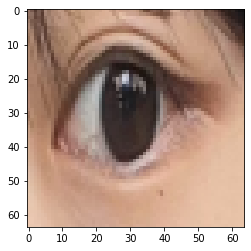

In [39]:
image = PIL.Image.open('/content/눈사진.jpg')
img =image.resize((64,64))
plt.imshow(img)
re_img = tf(img) # 해주면 image의 shape는 (3,64,64) 이된다
re_img = re_img.to('cuda')
pred_tag = predict(re_img)
print("눈사진: ", pred_tag)

prediction = predicts(re_img)
 
if prediction < 0.5: # 눈이 감으면
   text = "Closed ({:.2f}%)".format((1 - prediction[0][0])*100)
   print(text)

else: #눈을 뜨면
   text = "Open ({:.2f}%)".format(prediction[0][0]*100)
   print(text)

눈사진:  tensor([[0.]], device='cuda:0', grad_fn=<RoundBackward0>)
Closed (100.00%)


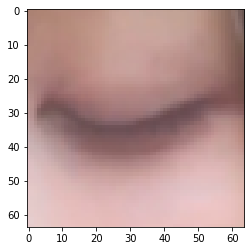

In [41]:
image2 = PIL.Image.open('/content/눈감음.jpg')
img2 =image2.resize((64,64))
plt.imshow(img2)
re_img2 = tf(img2) # 해주면 image의 shape는 (3,64,64) 이된다
re_img2 = re_img2.to('cuda')
pred_tag2 = predict(re_img2)
print("눈사진: ", pred_tag2)

prediction = predicts(re_img2)
 
if prediction < 0.5: # 눈이 감으면
   text = "Closed ({:.2f}%)".format((1 - prediction[0][0])*100)
   print(text)

else: #눈을 뜨면
   text = "Open ({:.2f}%)".format(prediction[0][0]*100)
   print(text)